In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
## Быстрый анализ данных
# Загрузите случайную выборку из этого набора.
# Сколько строк и столбцов в таблице?
# Каковы названия столбцов?
# Какие типы данных у столбцов?
# Сколько в каждом из них уникальных значений?
# Сколько пропущенных значений?
# Постройте распределения числовых переменных?

data = pd.read_csv("https://slemeshevsky.github.io/python-course/pandas/html/src-pandas/la-crimes-sample.csv.zip")
print(data.shape)
print(data.columns)
print(data.dtypes)
print(data.nunique())
print(data.isnull().sum())
print(data.describe())
print(data.info())

(39608, 27)
Index(['Unnamed: 0', 'DR Number', 'Date Reported', 'Date Occurred',
       'Time Occurred', 'Area ID', 'Area Name', 'Reporting District',
       'Crime Code', 'Crime Code Description', 'MO Codes', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')
Unnamed: 0                  int64
DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             obj

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

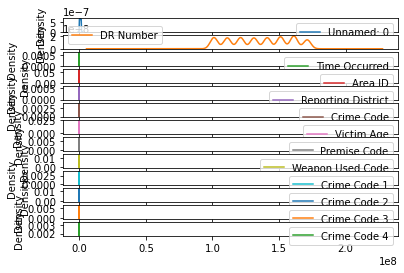

In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data.select_dtypes(include=numerics).plot.kde(subplots=True)

In [37]:
victim_sex_key = 'Victim Sex'
victim_desc_key = 'Victim Descent'
victim_age_key = 'Victim Age'
dr_number_key = 'DR Number'
area_name_key = 'Area Name'

In [38]:
obj = data[[victim_age_key, victim_sex_key, victim_desc_key]]
grouped_sex = obj.groupby(victim_sex_key).count()
print(obj)

       Victim Age Victim Sex Victim Descent
0            70.0          M              W
1            54.0          F              W
2            55.0          F              W
3            22.0          M              O
4             NaN          X              X
...           ...        ...            ...
39603        51.0          M              W
39604        37.0          F              F
39605        31.0          M              W
39606        12.0          M              H
39607        54.0          M              H

[39608 rows x 3 columns]


In [39]:
# - Происхождение
# Люди какого происхождения чаще всего подвергаются преступлениям?

<AxesSubplot:xlabel='Victim Descent'>

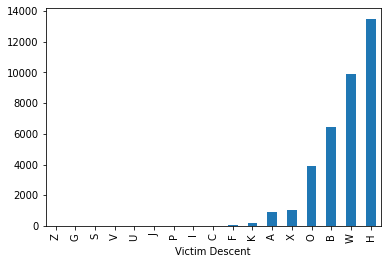

In [40]:
obj = data.groupby(victim_desc_key)[dr_number_key].count()
obj.sort_values().plot(x=victim_desc_key, kind="bar")

In [41]:
# Место проишествия
# Отсортируйте районы, по количеству преступлений. Постройте график, показывающий самые безопасный и опасный районы.

<AxesSubplot:xlabel='Area Name'>

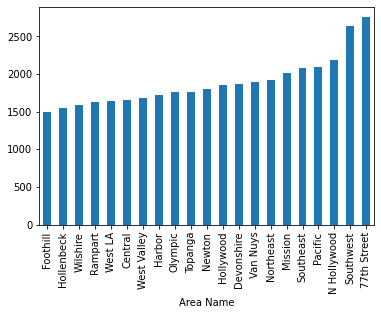

In [42]:
obj = data.groupby(area_name_key).count()
obj[dr_number_key].sort_values().plot(x=area_name_key, kind="bar")

<AxesSubplot:ylabel='Density'>

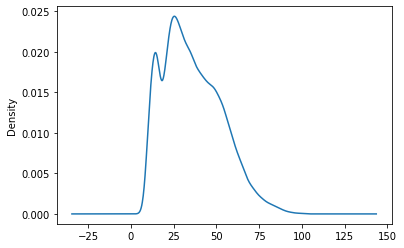

In [43]:
# Преступления, пол и возраст
# Изучите распределение количества преступлений по возрасту. Какова тенденция? Люди какого возраста чаще всего подвергаются преступлениям? Есть ли локальные минимумы? Используйте типы графиков hist и density.
# data["Victim Age"].plot(kind="hist")
data[victim_age_key].plot.kde()

           count unique                                                top  \
Crime Code                                                                   
745           69      1           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
510           73      1                                   VEHICLE - STOLEN   
420           78      1    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)   
740           83      1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
341          112      1  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...   
624          115      1                           BATTERY - SIMPLE ASSAULT   
330          148      1                              BURGLARY FROM VEHICLE   
440          154      1                 THEFT PLAIN - PETTY ($950 & UNDER)   
354          156      1                                  THEFT OF IDENTITY   
310          182      1                                           BURGLARY   

           freq  
Crime Code       
745          69  
510      

<AxesSubplot:xlabel='Crime Code'>

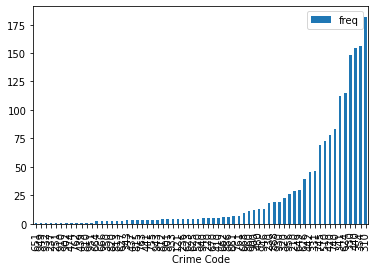

In [44]:
# Определите 10 самых распространённых преступлений в LA. Постройте график.
df_agg = data.loc[data[area_name_key].str.contains('LA')].groupby("Crime Code")["Crime Code Description"].describe().sort_values("freq")
print(df_agg.tail(10))
df_agg.plot(kind="bar", y="freq")

Victim Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
H    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
X    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Victim Age, dtype: object

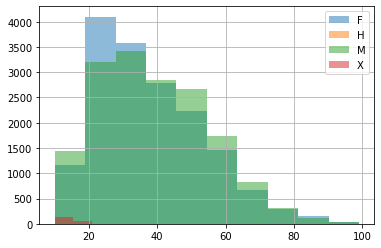

In [45]:
# Как различается вероятность женщин и мужчин стать жертвой в зависимости от возраста? Постройте визуализацию. В каком возрастном промежутке мужчины чаще становятся жетрвами преступлений?
df_agg = data.groupby(victim_sex_key)[victim_age_key]
df_agg.hist(alpha=0.5, legend=True)

# Из гистограммы видно, что с возрастом вероятность падает
# Мужчины в возрасте 20-40 лет чаще всего становятся жертвами

Victim Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
H    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
X    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Crime Code, dtype: object

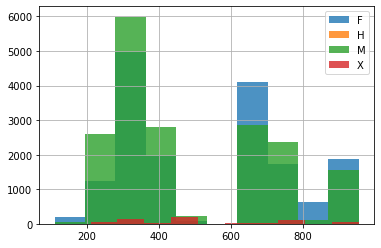

In [46]:
# От каких преступлений чаще старадют женщины, а от каких мужчины?
data.groupby(victim_sex_key)["Crime Code"].hist(legend=True, alpha=0.8)

<AxesSubplot:xlabel='Area Name'>

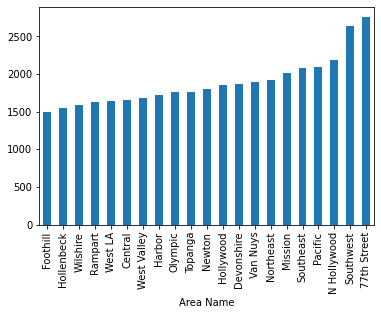

In [47]:
# Отсортируйте районы, по количеству преступлений. Постройте график, показывающий самые безопасный и опасный районы.
data.groupby(area_name_key).count()["Crime Code"].sort_values().plot(kind="bar")

            count unique top  freq
Area Name                         
77th Street  2440     10   B  1314
Central      1593      9   H   500
Devonshire   1706     10   W   728
Foothill     1297      8   H   715
Harbor       1517      8   H   673
Hollenbeck   1325     10   H   969
Hollywood    1723      9   W   739
Mission      1790      9   H  1086
N Hollywood  2012     12   W   949
Newton       1533      8   H   999
Northeast    1700      9   H   692
Olympic      1629      9   H   708
Pacific      1913      9   W   975
Rampart      1486      9   H   848
Southeast    1871      8   B   914
Southwest    2418     13   B  1107
Topanga      1662      7   W   705
Van Nuys     1765      7   W   677
West LA      1560      9   W   851
West Valley  1570      9   W   642
Wilshire     1466      7   W   541


<AxesSubplot:xlabel='Area Name'>

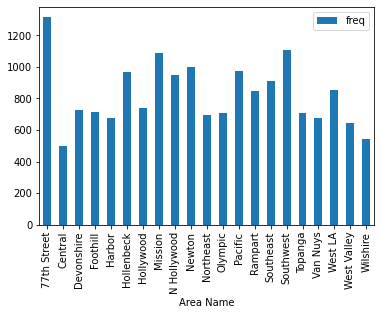

In [48]:
# Люди какого происхождения чаще всего страдают от преступлений в каждом из районов? 
# Не забудьте нормировать на общее количество жертв.
df = data.groupby(area_name_key)[victim_desc_key].describe()
print(df)
df.plot(y="freq", kind="bar")